In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [5]:
df = pd.read_csv('concertriccir2.csv')

In [6]:
df.head()

,7.003345706103683010e-01,-2.470675778972781789e-01,0.000000000000000000e+00
0,-3.950019,2.740080,1.0
1,0.150222,-2.157638,1.0
2,-1.672050,-0.941519,1.0
3,2.560483,-1.846577,1.0
4,-1.724979,3.463930,1.0


In [10]:
df = df.rename(columns={'7.003345706103683010e-01':'X','-2.470675778972781789e-01':'Y','0.000000000000000000e+00':'class'})

In [11]:
df

,X,Y,class
0,-3.950019,2.740080,1.0
1,0.150222,-2.157638,1.0
2,-1.672050,-0.941519,1.0
3,2.560483,-1.846577,1.0
4,-1.724979,3.463930,1.0
...,...,...,...
494,2.177895,2.984489,1.0
495,1.778905,2.869205,1.0
496,0.894180,3.069959,0.0
497,0.849439,3.875435,0.0


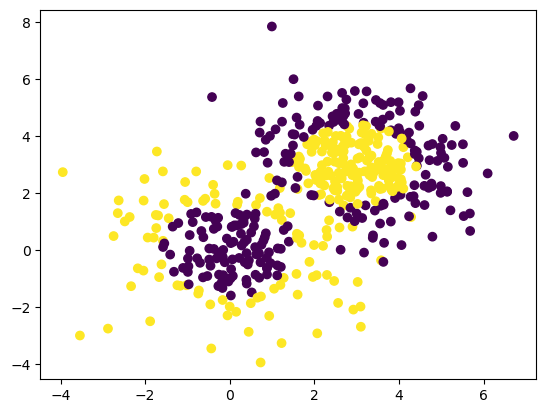

In [14]:
plt.scatter(df['X'],df['Y'],c=df['class'])